In [1]:
from functools import lru_cache, wraps
from typing import Tuple
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from main import cr_fast, cr_hybrid, cr_slow

In [2]:
# Define p_vals and v_vals
p_vals = np.linspace(0.0, 1, 100)
v_vals = np.linspace(0.0, 1, 100)

# Create meshgrid
P, V = np.meshgrid(p_vals, v_vals)

# Compute CRFast and CRSlow
CRFast = cr_fast(P)
CRSlow = cr_slow(V)
A, B, CRHybrid = cr_hybrid(V, P)


/home/jared/scratch/multi-speed-cow/main.py:48: RuntimeWarning: divide by zero encountered in divide
  return 8 / p + p / (2 - p)
/home/jared/scratch/multi-speed-cow/main.py:51: RuntimeWarning: divide by zero encountered in divide
  return 3 + 2 * np.sqrt(2 + 2 / v) + 2 / v
/home/jared/scratch/multi-speed-cow/main.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  return ((1 + a) * ((-1 + a) * (a * (-1 + p)**2 - (-2 + p) * p) + (a**2 +
/home/jared/scratch/multi-speed-cow/main.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  return (-1 + b + a * (-b + v + a * (1 + v + (-1 + a) * b * (1 + 2 * (1 + a) * v)))) / ((-1 + a) * (1 + (-1 + a**2) * b) * v)
/home/jared/miniconda3/envs/scratch/lib/python3.10/site-packages/scipy/optimize/_optimize.py:835: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


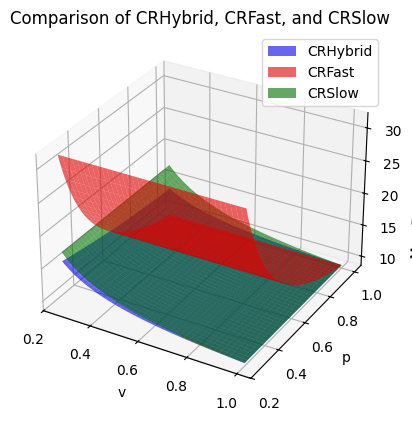

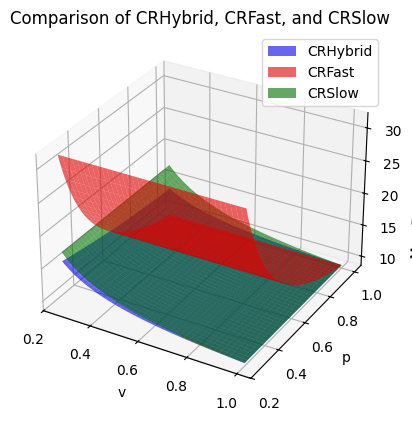

In [5]:
def plot_results(V: np.ndarray,
                 P: np.ndarray,
                 CRFast: np.ndarray,
                 CRSlow: np.ndarray,
                 CRHybrid: np.ndarray,
                 alpha: float = 0.6):
    ax: Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(V, P, CRHybrid, color='blue', alpha=alpha, label='CRHybrid')
    ax.plot_surface(V, P, CRFast, color='red', alpha=alpha, label='CRFast')    
    ax.plot_surface(V, P, CRSlow, color='green', alpha=alpha, label='CRSlow')
    
    ax.set_xlabel('v')
    ax.set_ylabel('p')
    ax.set_zlabel('Max Expression Value')
    ax.set_title('Comparison of CRHybrid, CRFast, and CRSlow')

    # legend
    plt.legend()

    return fig, ax


p_index = np.where(p_vals > 0.25)[0]
v_index = np.where(v_vals > 0.25)[0]
idx = np.ix_(v_index, p_index)

fig, ax = plot_results(
    V=V[idx],
    P=P[idx],
    CRFast=CRFast[idx],
    CRSlow=CRSlow[idx],
    CRHybrid=CRHybrid[idx]
)
fig

[[False False False ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_69052/3332815009.py:25: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(P, V, hybrid_better_than_fast, levels=1, colors=['blue'], alpha=0.5, label="CRHybrid < CRFast")
/tmp/ipykernel_69052/3332815009.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(P, V, slow_better_than_fast, levels=1, colors=['green'], alpha=0.5, label="CRSlow < CRFast")


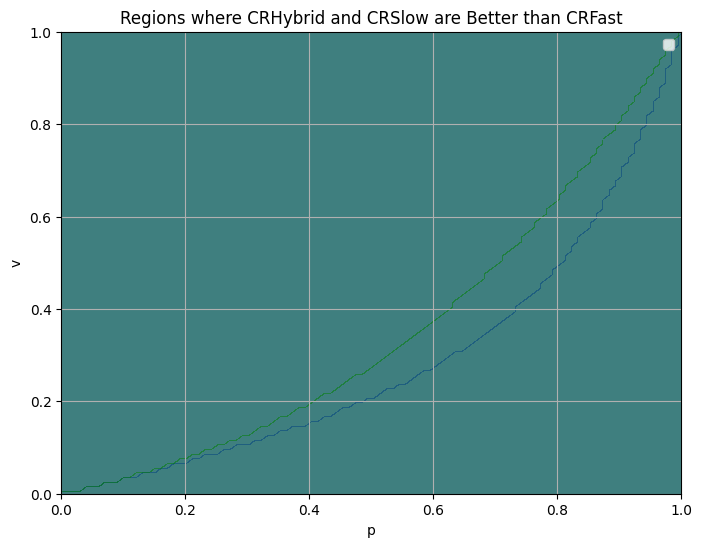

In [20]:
def plot_advantage_regions(V: np.ndarray,
                           P: np.ndarray,
                           CRFast: np.ndarray,
                           CRSlow: np.ndarray,
                           CRHybrid: np.ndarray):
    """
    Plots regions where CRHybrid is better than CRFast and where CRSlow is better than CRFast.

    Args:
        V (np.ndarray): Meshgrid of v values.
        P (np.ndarray): Meshgrid of p values.
        CRFast (np.ndarray): Competitive ratio of fast search.
        CRSlow (np.ndarray): Competitive ratio of slow search.
        CRHybrid (np.ndarray): Competitive ratio of hybrid search.
    """
    # Compute regions
    hybrid_better_than_fast = (CRHybrid < CRFast)  # Where CRHybrid is better than CRFast
    slow_better_than_fast = (CRSlow < CRFast)  # Where CRSlow is better than CRFast

    plt.figure(figsize=(8, 6))

    print(hybrid_better_than_fast)

    # Plot the regions
    plt.contourf(P, V, hybrid_better_than_fast, levels=1, colors=['blue'], alpha=0.5, label="CRHybrid < CRFast")
    plt.contourf(P, V, slow_better_than_fast, levels=1, colors=['green'], alpha=0.5, label="CRSlow < CRFast")

    # Contours for visualization
    # plt.contour(P, V, CRHybrid, levels=20, cmap='coolwarm', alpha=0.3)

    # Labels and legend
    plt.xlabel('p')
    plt.ylabel('v')
    plt.title('Regions where CRHybrid and CRSlow are Better than CRFast')
    plt.legend(["CRHybrid < CRFast (Blue)", "CRSlow < CRFast (Green)"])
    plt.grid(True)

plot_advantage_regions(V, P, CRFast, CRSlow, CRHybrid)